| Observing run | BBH-unlensed (Super, Sub+Super)  | BNS-unlensed (Super, Sub+Super) | Ratio BBH/BNS |
| ---           | ---       | ---       | ---             |
| O4 (H1, L1, V1) | 438.1, 1015.1 | 
| 3G (A+, ET, CE) | 100600.3, 101895.3 |

| Observing run | BBH-lensed (Super, Sub+Super)  | BNS-lensed (Super, Sub+Super) | Ratio BBH/BNS |
| ---           | ---       | ---       | ---             |
| O4 (H1, L1, V1) | 1.0, 2.1 |
| 3G (A+, ET, CE) | 107.6, 112.7 |

| Observing run | BBH-unlensed (Super, Sub+Super)  | BBH-lensed (Super, Sub+Super) | Ratio BBH-unlensed/BBH-lensed |
| ---           | ---       | ---       | ---             |
| O4 (H1, L1, V1) | 438.1, 1015.1 | 1.0, 2.1 | 438.1, 1015.1 |
| 3G (A+, ET, CE) | 100600.3, 101895.3 | 107.6, 112.7 | 100600.3, 101895.3 |

| Observing run | BNS-unlensed (Super, Sub+Super)  | BNS-lensed (Super, Sub+Super) | Ratio BNS-unlensed/BNS-lensed |
| ---           | ---       | ---       | ---             |
| O4 (H1, L1, V1) |  |  |
| 3G (A+, ET, CE) |  |  |

In [1]:
from ler.rates import LeR
from ler.utils import get_param_from_json
import numpy as np
import matplotlib.pyplot as plt

# other necessary imports
from astropy.cosmology import LambdaCDM

Setting multiprocessing start method to 'fork'


In [2]:
ler = LeR(
    npool=6,
    verbose=True,
    event_type='BNS',
)

z_to_luminosity_distance interpolator will be generated at ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_0.pickle
differential_comoving_volume interpolator will be generated at ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
merger_rate_density interpolator will be generated at ./interpolator_pickle/merger_rate_density/merger_rate_density_0.pickle
binary_masses_BNS_bimodal interpolator will be generated at ./interpolator_pickle/binary_masses_BNS_bimodal/binary_masses_BNS_bimodal_0.pickle
z_to_Dc interpolator will be generated at ./interpolator_pickle/z_to_Dc/z_to_Dc_0.pickle
Dc_to_z interpolator will be generated at ./interpolator_pickle/Dc_to_z/Dc_to_z_0.pickle
angular_diameter_distance interpolator will be generated at ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be generated at ./interpolator_pickle/differential_comoving_volume/diffe

interpolation for each mass_ratios: 100%|███████████████████████████| 50/50 [00:58<00:00,  1.18s/it]


 LeR set up params:
npool = 4,
z_min = 0.0,
z_max = 10.0,
event_type = 'BNS',
size = 100000,
batch_size = 50000,
cosmology = LambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Ode0=0.7, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None),
snr_finder = <bound method GWSNR.snr of <gwsnr.gwsnr.GWSNR object at 0x31b623ca0>>,
json_file_names = {'ler_params': 'ler_params.json', 'unlensed_param': 'unlensed_param.json', 'unlensed_param_detectable': 'unlensed_param_detectable.json', 'lensed_param': 'lensed_param.json', 'lensed_param_detectable': 'lensed_param_detectable.json'},
interpolator_directory = ./interpolator_pickle,
ler_directory = ./ler_data,

 LeR also takes CBCSourceParameterDistribution class params as kwargs, as follows:
source_priors = {'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 'source_frame_masses': 'binary_masses_BNS_bimodal', 'zs': 'sample_source_redshift', 'geocent_time': 'sampler_uniform', 'ra': 'sampler_uniform', 'dec': 'sampler_cosine', 'phase': 'sampler_uniform'

In [3]:
# unlensed
ler.selecting_n_unlensed_detectable_events(
    size=5000,
    batch_size=200000,
    snr_threshold=6.0,
    resume=False,
    output_jsonfile='n_unlensed_param_detectable_O4_super_sub_bns.json',
    meta_data_file='meta_unlensed_O4_super_sub_bns.json',
    detectability_condition='step_function',
    trim_to_size=False,
);

removing ./ler_data/n_unlensed_param_detectable_O4_super_sub_bns.json and ./ler_data/meta_unlensed_O4_super_sub_bns.json if they exist
collected number of detectable events =  0
given detectability_condition == 'step_function'
collected number of detectable events =  10
total number of events =  200000
total rate (yr^-1): 22.848672786251033
given detectability_condition == 'step_function'
collected number of detectable events =  26
total number of events =  400000
total rate (yr^-1): 29.703274622126337
given detectability_condition == 'step_function'
collected number of detectable events =  38
total number of events =  600000
total rate (yr^-1): 28.94165219591797
given detectability_condition == 'step_function'
collected number of detectable events =  52
total number of events =  800000
total rate (yr^-1): 29.703274622126337
given detectability_condition == 'step_function'
collected number of detectable events =  65
total number of events =  1000000
total rate (yr^-1): 29.7032746221263

SystemError: CPUDispatcher(<function get_interpolated_snr at 0x33ec9bd90>) returned a result with an exception set

In [11]:
ler = LeR(
    verbose=False,
    z_max=10,
    event_type='BNS',
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    mtot_max=51,
    ifos=['L1','H1','V1'],
)

interpolation for each mass_ratios: 100%|███████████████████████████| 50/50 [03:05<00:00,  3.72s/it]


## Unlensed 

In [12]:
ler.selecting_n_unlensed_detectable_events(
    size=5000,
    batch_size=200000,
    snr_threshold=6.0,
    resume=False,
    output_jsonfile='n_unlensed_param_detectable_O4_super_sub_bns.json',
    meta_data_file='meta_unlensed_O4_super_sub_bns.json',
    detectability_condition='step_function',
    trim_to_size=False,
);

removing ./ler_data/n_unlensed_param_detectable_O4_super_sub_bns.json and ./ler_data/meta_unlensed_O4_super_sub_bns.json if they exist
collected number of detectable events =  0
given detectability_condition == 'step_function'
collected number of detectable events =  23
total number of events =  200000
total rate (yr^-1): 52.55194740837737
given detectability_condition == 'step_function'
collected number of detectable events =  42
total number of events =  400000
total rate (yr^-1): 47.982212851127166
given detectability_condition == 'step_function'
collected number of detectable events =  66
total number of events =  600000
total rate (yr^-1): 50.267080129752266
given detectability_condition == 'step_function'
collected number of detectable events =  85
total number of events =  800000
total rate (yr^-1): 48.55342967078344
given detectability_condition == 'step_function'
collected number of detectable events =  110
total number of events =  1000000
total rate (yr^-1): 50.2670801297522

In [13]:
# 438.1, 1015.1 | 21.1, 46.4 |
438.1/21.1, 1015.1/46.4

(20.76303317535545, 21.877155172413794)

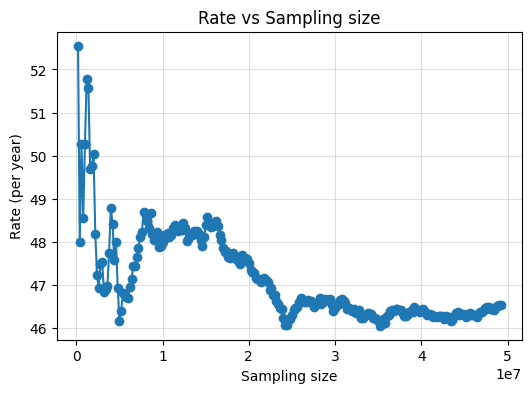

In [14]:
# getting data from json
meta_data= get_param_from_json("./ler_data/meta_unlensed_O4_super_sub_bns.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

### Sub+Super

In [15]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 3e7)[0]
# take average 
gw_rate_unlensed1 = np.mean(meta_data['total_rate'][idx])
print('Unlensed GW Rate (per year), SNR>6 =', gw_rate_unlensed1)

Unlensed GW Rate (per year), SNR>6 = 46.348848086751424


### Super

In [16]:
unlensed_param = get_param_from_json("./ler_data/n_unlensed_param_detectable_O4_super_sub_bns.json")

In [19]:
21.07/snr8_vs_snr6

51.59369501466276

In [17]:
snr = unlensed_param['optimal_snr_net']
idx = snr>8.0
snr8_vs_snr6 = np.sum(idx)/len(snr)
print('Unlensed GW Rate (per year), SNR>8 =', gw_rate_unlensed1*snr8_vs_snr6) 

Unlensed GW Rate (per year), SNR>8 = 18.928092452194296


## Lensed events

In [21]:
ler.selecting_n_lensed_detectable_events(
    size=1000,
    batch_size=200000,
    snr_threshold=[6.0, 6.0],
    num_img=[1, 1],
    resume=True,
    detectability_condition='step_function',
    output_jsonfile='n_lensed_param_detectable_O4_super_sub_bns.json',
    meta_data_file='meta_lensed_O4_super_sub_bns.json',
    trim_to_size=False,
    nan_to_num=False,
);

collected number of detectable events =  0


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.97it/s]


given detectability_condition == step_function
collected number of detectable events =  32
total number of events =  200000
total rate (yr^-1): 0.16038839266145247


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.36it/s]


given detectability_condition == step_function
collected number of detectable events =  52
total number of events =  400000
total rate (yr^-1): 0.13031556903743013


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.29it/s]


given detectability_condition == step_function
collected number of detectable events =  75
total number of events =  600000
total rate (yr^-1): 0.12530343176675976


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.98it/s]


given detectability_condition == step_function
collected number of detectable events =  98
total number of events =  800000
total rate (yr^-1): 0.12279736313142456


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.17it/s]


given detectability_condition == step_function
collected number of detectable events =  129
total number of events =  1000000
total rate (yr^-1): 0.12931314158329604


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.18s/it]


given detectability_condition == step_function
collected number of detectable events =  156
total number of events =  1200000
total rate (yr^-1): 0.13031556903743013


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.97it/s]


given detectability_condition == step_function
collected number of detectable events =  186
total number of events =  1400000
total rate (yr^-1): 0.13317964747781322


 23%|████████████▋                                         | 46822/200000 [00:14<00:46, 3289.09it/s]


KeyboardInterrupt: 

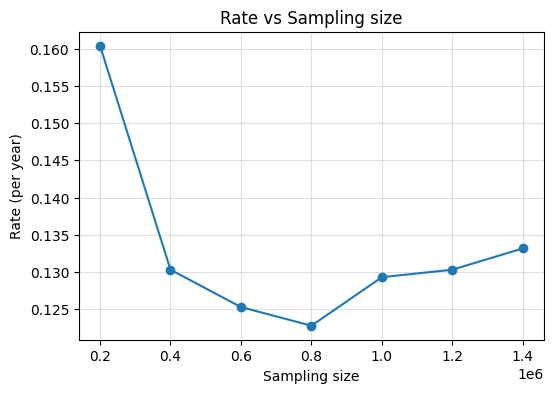

In [22]:
# getting data from json
meta_data= get_param_from_json("./ler_data/meta_lensed_O4_super_sub_bns.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

### Sub+Super

In [23]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 0.8e6)[0]
# take average 
gw_rate_lensed1 = np.mean(meta_data['total_rate'][idx])
print('Lensed GW Rate (per year), 2 or more images SNR>6 =', gw_rate_lensed1)

Lensed GW Rate (per year), 2 or more images SNR>6 = 0.1309361193661798


### Super

In [24]:
snr_lensed = get_param_from_json("./ler_data/n_lensed_param_detectable_O4_spur_sub.json")['optimal_snr_net']
idx = snr_lensed>8.0
idx = np.sum(idx, axis=1)>=2
snr8_vs_snr6 = np.sum(idx)/len(snr_lensed)
print('Lensed GW Rate (per year), 2 or more images SNR>8 =', gw_rate_lensed1*snr8_vs_snr6)

Lensed GW Rate (per year), 2 or more images SNR>8 = 0.06112493049677506


In [26]:
0.0526/snr8_vs_snr6

0.11267480916030534

In [27]:
# 438.1, 1015.1 | 21.1, 51.6 | 
438.1/21.1, 1015.1/51.6

(20.76303317535545, 19.67248062015504)

In [28]:
# 1.0, 2.1 | 5.3e-2, 11.3e-2
1.0/5.3e-2, 2.1/11.3e-2

(18.867924528301888, 18.58407079646018)

In [29]:
# 21.1, 51.6 | 5.3e-2, 11.3e-2
21.1/5.3e-2, 51.6/11.3e-2

(398.11320754716985, 456.6371681415929)

In [32]:
# 11543.2 | 21.1, 51.6 |
11543.2/21.1, 11543.2/51.6

(547.0710900473933, 223.70542635658916)

In [2]:
12.766198126882331/0.030125669237901803

423.76479759065006

In [5]:
3.8726564044493275/0.005009117047937619

773.1215636184422

In [4]:
3.8726564044493275/0.0030054702287625715

1288.5359393640704

In [6]:
3.8726564044493275/0.006010940457525143

644.2679696820352

In [9]:
1.888320064979424/0.0025045585239688094

753.9532603882329